In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
img = np.fromfile('img.out', dtype=np.uint16).reshape(240, 320)

In [106]:
r = img // 2**11 / (2**5)
g = img // 2**5 % 2**6 / (2**6)
b = img % 2**5 / (2**5)
fig = np.stack([r, g, b], axis=-1)

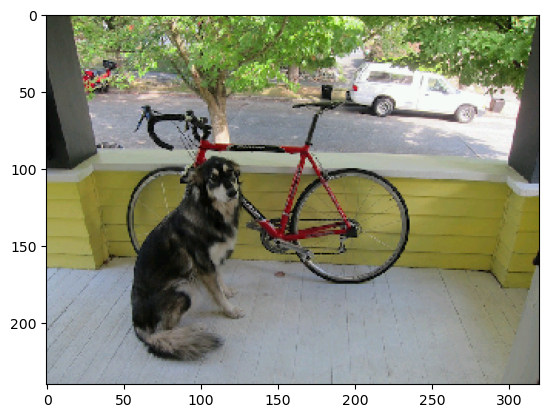

In [107]:
plt.imshow(fig.reshape(240, 160, 2, 3)[:, :, ::-1, :].reshape(240, 320, 3))

In [108]:
my_img = plt.imread('image.png')
my_img.shape

(194, 259, 4)

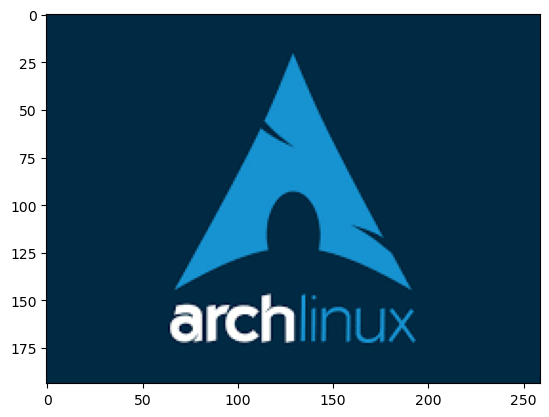

In [109]:
plt.imshow(my_img)

In [110]:
buffer = np.zeros((240, 320, 3))
buffer[:] = my_img[0, 0, :3]
buffer[23:23+194, 30:30+259, :] = my_img[..., :3]

In [111]:
# my_img.shape = [240, 320, 3]
r, g, b = buffer.transpose(2, 0, 1)
final = np.uint16(r * (2 ** 5 - 1)) * 2 ** 11 + np.uint16(g * (2 ** 6 - 1)) * 2 ** 5 + np.uint16(b * (2 ** 5 - 1))
final = final.reshape(240, 160, 2, -1)[:, :, ::-1, :].reshape(240, 320, -1)

In [112]:
with open('image2.h', 'w') as f:
    a = final.ravel()
    f.write('#pragma once\n')
    f.write('#include<stdint.h>\n')
    f.write('uint16_t rgb_image[] __attribute__((aligned(64))) = {\n')
    for i, x in enumerate(a):
        if i % 32 == 0: f.write('\n')
        f.write(f'0x{x:04x}')
        if i + 1 < len(a): f.write(',')
    f.write('\n};')